# Quality Coffee Analysis with Python

Coffee quality analysis involves various parameters that are assessed to determine the overall quality of coffee. These parameters provide valuable insights into the characteristics and flavor profile of the coffee. Here is a summary of some commonly used coffee quality analysis parameters and their mean values:

* Acidity: Acidity refers to the sharp, tangy taste in coffee and is an important factor in determining its overall flavor. The mean acidity value for high-quality coffee typically falls within the range of 7 to 9 on a scale of 1 to 10.

* Body: Body describes the physical sensation and weight of the coffee in the mouth. It can range from light and delicate to full and heavy. The mean body value for good-quality coffee generally falls between 6 and 8.

* Aroma: Aroma relates to the fragrance and smell of the coffee. It encompasses a wide range of scents, including floral, fruity, nutty, and chocolaty notes. The mean aroma value for excellent coffee usually ranges from 8 to 9.

* Flavor: Flavor encompasses the overall taste experience of the coffee, including the combination of acidity, sweetness, bitterness, and other characteristic notes. The mean flavor value for top-quality coffee is typically around 8.

* Balance: Balance refers to the harmony and integration of different flavors in the coffee. It is the proper blending of acidity, sweetness, and bitterness, resulting in a well-rounded and pleasant cup. The mean balance value for premium coffee generally falls between 7 and 9.

* Aftertaste: Aftertaste is the lingering taste that remains in the mouth after swallowing the coffee. A desirable aftertaste is long-lasting, clean, and enjoyable. The mean aftertaste value for high-quality coffee typically ranges from 7 to 9.

It's important to note that these mean values are general guidelines, and coffee quality can vary based on various factors such as origin, processing methods, roast level, and personal preferences. Additionally, coffee quality analysis often involves a sensory evaluation by trained professionals who assess these parameters subjectively, considering their individual expertise and taste preferences.

In [3]:
#Importing data analysis libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
#Importing information for data analysis: dataset quality coffee parameters
df_quality_coffee = pd.read_csv('df_arabica_clean.csv', header=0, delimiter=',')
df_quality_coffee.head(10)

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
5,5,5,Guatemala,La Colina,"The 2022 Pacific Rim Coffee Summit,GT02",Dinámica Café,NaN,Taiwan Coffee Laboratory,1668,Chimaltenango,...,87.00,10.7,0,0,green,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
6,6,6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,"The 2022 Pacific Rim Coffee Summit,T034",野牡丹咖啡,NaN,Taiwan Coffee Laboratory,1250,Chiayi,...,86.92,9.1,0,0,green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
7,7,7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,"The 2022 Pacific Rim Coffee Summit,T050",七彩琉璃咖啡莊園,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,86.75,10.0,0,0,yellow green,1,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
8,8,8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,"The 2022 Pacific Rim Coffee Summit,T018",亮軒咖啡莊園,NaN,Taiwan Coffee Laboratory,1250,Chiayi,...,86.67,10.8,0,0,greenish,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
9,9,9,"Tanzania, United Republic Of",MASHIMA AMCOS,CN 4127230034/4189230113,GOURMET COFFEE MILL,033/DE/503/002 and 033/DE/268/002,DORMAN (T) LIMITED,1400-1700,KILIMANJARO,...,86.50,11.0,0,0,greenish,0,"February 1st, 2024",Kenya Coffee Traders Association,"P.O. Box 646 00100Nairobi, Kenya, Denniss Prit...",Benson Kibicho Kamau - +254 786 821 621


In [6]:
#Identifying the information in the dataset 
df_quality_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

In [7]:
#Substracting the columns of the dataset 
quality_coffee_columns = df_quality_coffee.columns
print(quality_coffee_columns)

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')


In [8]:
#Making a copy of the dataset 
df_qa_coffee_copy = df_quality_coffee.copy()

#Identify null counts in the dataset
df_qa_coffee_copy.isna().sum()

Unnamed: 0                 0
ID                         0
Country of Origin          0
Farm Name                  2
Lot Number                 1
Mill                       3
ICO Number               132
Company                    0
Altitude                   1
Region                     2
Producer                   1
Number of Bags             0
Bag Weight                 0
In-Country Partner         0
Harvest Year               0
Grading Date               0
Owner                      0
Variety                    6
Status                     0
Processing Method          5
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean Cup                  0
Sweetness                  0
Overall                    0
Defects                    0
Total Cup Points           0
Moisture Percentage        0
Category One Defects       0
Quakers       

As we can identify in the dataset the number of null values it's less than 10 for almost all columns. Unless for the ICO Number column, wich means the number that the International Coffee Organization gives to each mill, country or business that's associated with the organization. 

In [50]:
#Extracting information of interest
df_coffee_parameters= df_qa_coffee_copy.iloc[: , 21:32]

#Country columns 
Countries = df_qa_coffee_copy['Country of Origin']
#Modification ot include the countries 
df_coffee_parameters_countries = df_coffee_parameters.assign(Country=Countries)

#Sorting values by country name
df_coffee_parameters_countries = df_coffee_parameters_countries.sort_values(by='Country', ascending=True)
df_coffee_parameters_countries.head(10)

,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Country
206,7.08,6.67,6.83,6.83,6.67,10.0,10.0,10.0,6.67,0.0,78.00,Brazil
129,7.50,7.50,7.83,7.67,7.50,10.0,10.0,10.0,7.67,0.0,83.25,Brazil
56,7.92,7.75,7.92,7.67,7.83,10.0,10.0,10.0,7.83,0.0,84.75,Brazil
158,7.58,7.50,7.50,7.67,7.42,10.0,10.0,10.0,7.33,0.0,82.50,Brazil
183,7.50,7.42,7.33,7.33,7.33,10.0,10.0,10.0,7.42,0.0,81.83,Brazil
184,7.50,7.58,7.33,7.33,7.25,10.0,10.0,10.0,7.33,0.0,81.75,Brazil
25,8.08,7.83,7.92,8.00,7.83,10.0,10.0,10.0,8.00,0.0,85.50,Brazil
194,7.42,7.25,7.25,7.17,7.25,10.0,10.0,10.0,7.25,0.0,81.00,Brazil
201,7.17,7.17,7.08,7.17,7.17,10.0,10.0,10.0,7.17,0.0,80.17,Brazil
202,7.17,6.92,7.17,7.42,7.17,10.0,10.0,10.0,7.08,0.0,80.08,Brazil


As we can identify they are various farms in each country that produce coffee. We are going to focuse on identify and make a ponderation of all the farms to give an specific value for each country in each of the coffee quality parameters in this dataset. Also we are going to focuse on what makes a good total cup points based on all the qualities mentioned before.  

Flavor               7.744734
Aftertaste           7.599758
Acidity              7.690290
Body                 7.640918
Balance              7.644058
Uniformity           9.990338
Clean Cup           10.000000
Sweetness           10.000000
Overall              7.676812
Defects              0.000000
Total Cup Points    83.706570
dtype: float64


<Figure size 10000x10000 with 0 Axes>

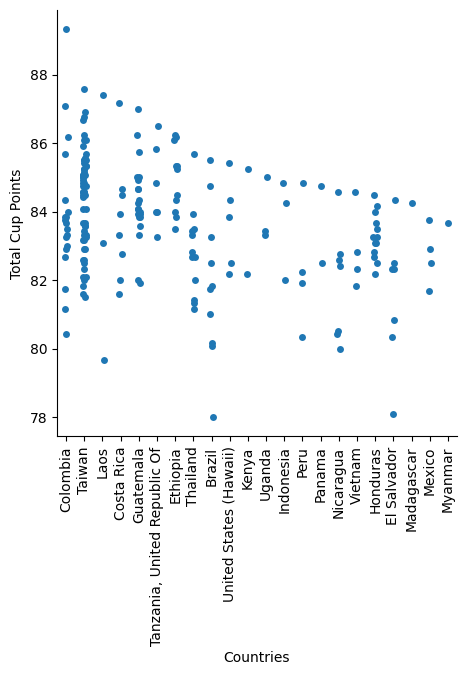

In [69]:
mean_coffee_values = df_coffee_parameters.mean()
print(mean_coffee_values)

#Identify a scatter plot of data 
plt.figure(figsize=(100,100))
sns.catplot(data=df_coffee_parameters, x=Countries, y= df_coffee_parameters_countries['Total Cup Points'])
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.show()